<a href="https://colab.research.google.com/github/nickmirunsw/py-learning/blob/main/tensorflow/tfnm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# chatgpt cheatsheet and example

# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt

# # 1. Core TensorFlow Operations
# print("\n### Core TensorFlow Operations ###")
# constant_tensor = tf.constant([1, 2, 3], dtype=tf.float32, name="my_constant")
# variable_tensor = tf.Variable(initial_value=[4, 5, 6], trainable=True, dtype=tf.float32, name="my_variable")

# print("Constant:", constant_tensor.numpy())
# print("Variable:", variable_tensor.numpy())

# # 2. Keras Model Building
# print("\n### Keras Model Building ###")
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=128, activation='relu', input_shape=(64,), name="dense_1"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_1"),
#     tf.keras.layers.Dropout(rate=0.2, name="dropout_1"),
#     tf.keras.layers.Dense(units=64, activation='relu', name="dense_2"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_2"),
#     tf.keras.layers.Dense(units=10, activation='softmax', name="output")
# ], name="sequential_model")

# model.summary()

# # 3. Model Compilation
# print("\n### Model Compilation ###")
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )

# # 4. Data Preprocessing
# print("\n### Data Preprocessing ###")
# x_train = np.random.rand(1000, 64)  # Dummy training data (1000 samples, 64 features)
# y_train = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(1000,)), num_classes=10)

# x_val = np.random.rand(200, 64)  # Validation data
# y_val = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(200,)), num_classes=10)

# # Normalize data (common preprocessing step)
# x_train = (x_train - np.mean(x_train)) / np.std(x_train)
# x_val = (x_val - np.mean(x_val)) / np.std(x_val)

# # 5. Model Training with Callbacks
# print("\n### Model Training ###")
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=3, restore_best_weights=True, verbose=1
# )
# history = model.fit(
#     x=x_train,
#     y=y_train,
#     validation_data=(x_val, y_val),
#     epochs=20,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # 6. Visualizing Training History
# print("\n### Visualizing Training History ###")
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # 7. Model Evaluation
# print("\n### Model Evaluation ###")
# loss, accuracy = model.evaluate(x_val, y_val, verbose=1)
# print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# # 8. Model Prediction
# print("\n### Model Prediction ###")
# predictions = model.predict(x_val[:5])
# print("Predictions (softmax probabilities):", predictions)

# # 9. Transfer Learning with Pretrained Models
# print("\n### Transfer Learning ###")
# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=(128, 128, 3),
#     include_top=False,
#     weights='imagenet'
# )
# base_model.trainable = False

# transfer_model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# transfer_model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )
# transfer_model.summary()

# # Dummy image data
# x_train_images = np.random.rand(100, 128, 128, 3)  # 100 RGB images of size 128x128
# y_train_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(100,)), num_classes=10)

# x_val_images = np.random.rand(20, 128, 128, 3)
# y_val_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(20,)), num_classes=10)

# # Train transfer learning model
# transfer_model.fit(
#     x=x_train_images,
#     y=y_train_images,
#     validation_data=(x_val_images, y_val_images),
#     epochs=5,
#     batch_size=16
# )

# # 10. Model Saving and Loading
# print("\n### Model Saving and Loading ###")
# model.save("my_model.h5")
# loaded_model = tf.keras.models.load_model("my_model.h5")
# print("Model loaded successfully!")

# # 11. TensorFlow Dataset API
# print("\n### TensorFlow Dataset API ###")
# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# dataset = dataset.shuffle(buffer_size=100).batch(32).prefetch(tf.data.AUTOTUNE)

# for batch in dataset.take(1):
#     print("A batch of data:", batch)

# # 12. Advanced TensorFlow Features: Gradient Tape
# print("\n### Gradient Tape ###")
# x = tf.constant(3.0)
# y = tf.constant(4.0)

# with tf.GradientTape() as tape:
#     tape.watch(x)
#     z = x ** 2 + y ** 2
# gradients = tape.gradient(z, x)
# print("Gradient of z with respect to x:", gradients.numpy())


In [16]:
from ast import increment_lineno
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [17]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [18]:
print(f"x_train --> Shape:{x_train.shape} Length:{len(x_train)}")
print("=============")
print(f"x_train --> Shape:{y_train.shape} Length:{len(y_train)}")
print("=============")
print(f"x_test -->  Shape:{x_test.shape} Length:{len(x_test)}")
print("=============")
print(f"y_test -->  Shape:{y_test.shape} Length:{len(y_test)}")
print("=============")
print(x_train[0].shape)
print("=============")
print(y_train[0])
print("=============")
print(x_test[0].shape)
print("=============")
print(y_test[0])
print("=============")
# print(x_train[0])

x_train --> Shape:(60000, 28, 28) Length:60000
x_train --> Shape:(60000,) Length:60000
x_test -->  Shape:(10000, 28, 28) Length:10000
y_test -->  Shape:(10000,) Length:10000
(28, 28)
5
(28, 28)
7


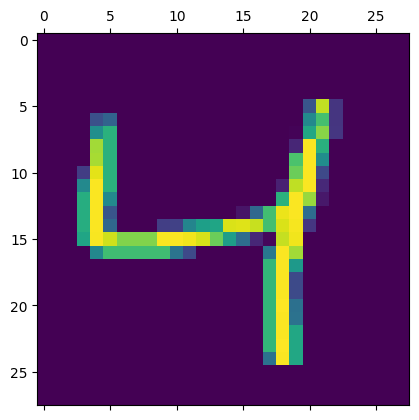

In [19]:
plt.matshow(x_train[2])

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
x_train_flattened = x_train.reshape((60000, 28*28))
x_test_flattened = x_test.reshape((10000, 28*28))
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [22]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8205 - loss: 0.7078
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9145 - loss: 0.3077
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9190 - loss: 0.2852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9258 - loss: 0.2667
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9237 - loss: 0.2666


In [23]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9150 - loss: 0.3017


[0.2655116319656372, 0.925599992275238]

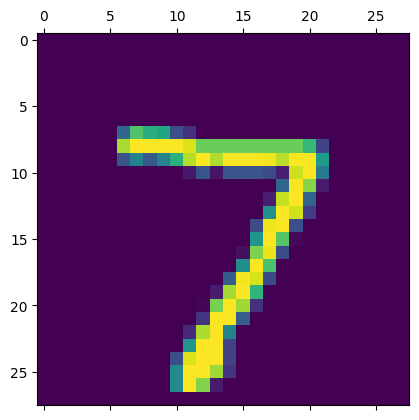

In [24]:
plt.matshow(x_test[0])

In [25]:
y_predicted = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [26]:
print(np.argmax(y_predicted[0]))

7


In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 964    0    1    2    0    4    6    2    1    0]
 [   0 1115    3    2    0    1    4    2    8    0]
 [   6    9  927   18    8    3   11    9   38    3]
 [   2    0   19  927    1   22    2    8   21    8]
 [   2    1    3    1  924    0    9    3    9   30]
 [   9    3    3   37   11  768   13    5   35    8]
 [  11    3    8    1    7   16  907    2    3    0]
 [   1    5   25    8   10    0    0  937    2   40]
 [   8    7    7   23    9   21    9    9  871   10]
 [  11    7    1   10   37    6    0   14    7  916]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

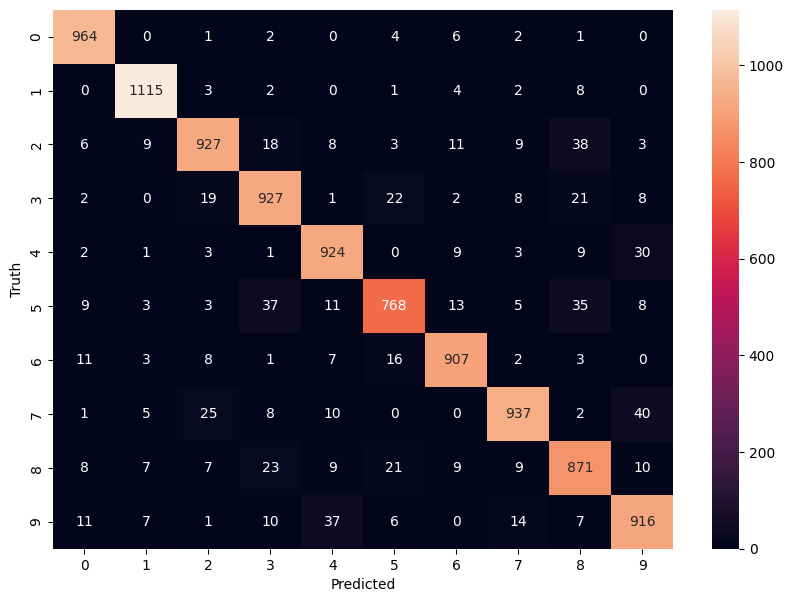

In [29]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [30]:
model = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation="relu"),
                          keras.layers.Dense(10, activation='sigmoid')
                          ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8674 - loss: 0.4647
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9627 - loss: 0.1314
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9743 - loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9845 - loss: 0.0524


In [31]:
y_predicted = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

tf.Tensor(
[[ 957    0    3    1    0    7    5    2    4    1]
 [   0 1126    3    0    0    1    1    1    3    0]
 [   4    2 1003    2    1    3    2    5   10    0]
 [   0    0    1  957    0   34    0    5    3   10]
 [   1    1    3    1  960    0    4    2    0   10]
 [   1    0    0    1    1  880    3    1    3    2]
 [   1    3    2    0    3   14  934    0    1    0]
 [   0    6    7    1    1    0    0 1005    3    5]
 [   0    2    0    5    5    7    0    2  949    4]
 [   1    4    0    3    7   14    1    4    2  973]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

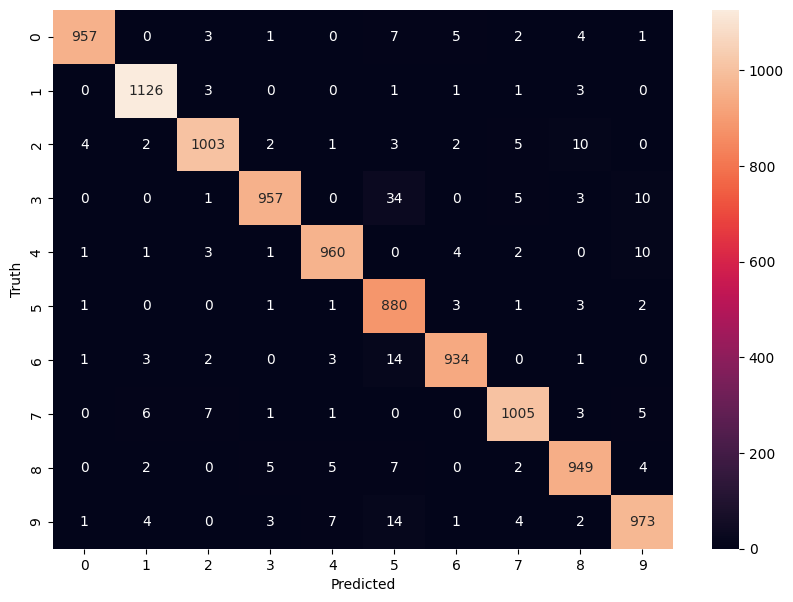

In [33]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [34]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(100, activation="relu"),
                          keras.layers.Dense(10, activation='sigmoid')
                          ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8753 - loss: 0.4524
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9629 - loss: 0.1288
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9738 - loss: 0.0867
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0631
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9848 - loss: 0.0503
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9886 - loss: 0.0381
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9898 - loss: 0.0333
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9932 - loss: 0.0231
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9939 - loss: 0.0206
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9953 - loss: 0.0162


In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/6_gradient_descent/insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [37]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [38]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7072
